## Abby Bosch
## 12/14/22

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
covid = pd.read_csv(r"C:\Users\editor\Documents\clean_covid.csv")

I imported the tools I would need to analyze and graph the data

In [2]:
covid

,Unnamed: 0,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,0,2,1,1,1,03/05/2020,99,1,65,2,...,2,2,1,2,2,2,2,2,3,99
1,1,2,1,2,1,03/06/2020,99,1,72,99,...,2,2,1,2,2,1,1,2,5,99
2,2,2,1,2,2,09/06/2020,1,2,55,99,...,2,2,2,2,2,2,2,2,3,2
3,3,2,1,1,1,12/06/2020,99,2,53,2,...,2,2,2,2,2,2,2,2,7,99
4,4,2,1,2,1,21/06/2020,99,2,68,99,...,2,2,1,2,2,2,2,2,3,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,2,13,2,1,9999-99-99,99,2,40,99,...,2,2,2,2,2,2,2,2,7,99
1048571,1048571,1,13,2,2,9999-99-99,2,2,51,99,...,2,2,1,2,2,2,2,2,7,2
1048572,1048572,2,13,2,1,9999-99-99,99,2,55,99,...,2,2,2,2,2,2,2,2,7,99
1048573,1048573,2,13,2,1,9999-99-99,99,2,28,99,...,2,2,2,2,2,2,2,2,7,99


In [5]:
covid.columns

Index(['Unnamed: 0', 'USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE',
       'DATE_DIED', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES',
       'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE',
       'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO',
       'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

I realized that the way I had DATE_DIED set up was not beneficial for graphing, so in place of that, I made a column that would give 1 if the patient did die, and 2 if the patient did not die. In the DATE_DIED column, anything that did not have the default date of '9999-99-99' indicated that the patient died. I also dropped the DATE_DIED column seeing as it is no longer needed

In [9]:
covid["DIED"] = [2 if val == '9999-99-99' else 1 for val in covid.DATE_DIED]

In [10]:
covid.drop(columns=["DATE_DIED"],inplace = True)


In [94]:
covid

,Unnamed: 0,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DIED
0,0,2,1,1,1,99,1,65,2,2,...,2,1,2,2,2,2,2,3,99,1
1,1,2,1,2,1,99,1,72,99,2,...,2,1,2,2,1,1,2,5,99,1
2,2,2,1,2,2,1,2,55,99,1,...,2,2,2,2,2,2,2,3,2,1
3,3,2,1,1,1,99,2,53,2,2,...,2,2,2,2,2,2,2,7,99,1
4,4,2,1,2,1,99,2,68,99,1,...,2,1,2,2,2,2,2,3,99,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,2,13,2,1,99,2,40,99,2,...,2,2,2,2,2,2,2,7,99,2
1048571,1048571,1,13,2,2,2,2,51,99,2,...,2,1,2,2,2,2,2,7,2,2
1048572,1048572,2,13,2,1,99,2,55,99,2,...,2,2,2,2,2,2,2,7,99,2
1048573,1048573,2,13,2,1,99,2,28,99,2,...,2,2,2,2,2,2,2,7,99,2


In [3]:
underlying = covid[['PNEUMONIA','PREGNANT','DIABETES','COPD','ASTHMA','INMSUPR','HIPERTENSION','OTHER_DISEASE','CARDIOVASCULAR','OBESITY','TOBACCO']]

In order to get a good look at which pre-existing condition was the most frequent, I melted the columns containing each condition into one so that they may be properly graphed, I also removed all of the 2's and 99's in the column so that we only have positive cases to look at

In [4]:
underlying2 = underlying.melt(value_vars = underlying.columns)
underlying2 = underlying2[underlying2["value"] == 1]

In [5]:
underlying2

,variable,value
0,PNEUMONIA,1
1,PNEUMONIA,1
5,PNEUMONIA,1
7,PNEUMONIA,1
16,PNEUMONIA,1
...,...,...
11534293,TOBACCO,1
11534294,TOBACCO,1
11534295,TOBACCO,1
11534311,TOBACCO,1


Text(0.5, 1.0, 'Hypertension is the most frequent condition in patients')

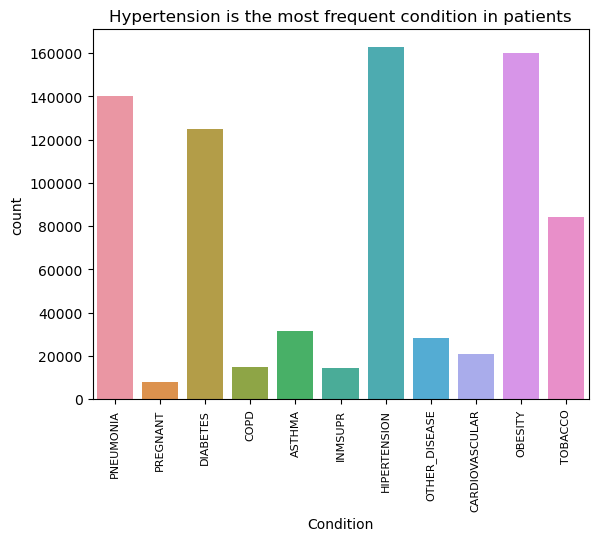

In [7]:
und = sns.countplot(data = underlying2, x = 'variable')
plt.xticks(rotation = 90, fontsize = 8)
plt.xlabel("Condition")
plt.title("Hypertension is the most frequent condition in patients")

By looking at this graph, we can see that hypertension has the most amount of cases out of all of our patients, with obesity issues being a close second

<AxesSubplot:>

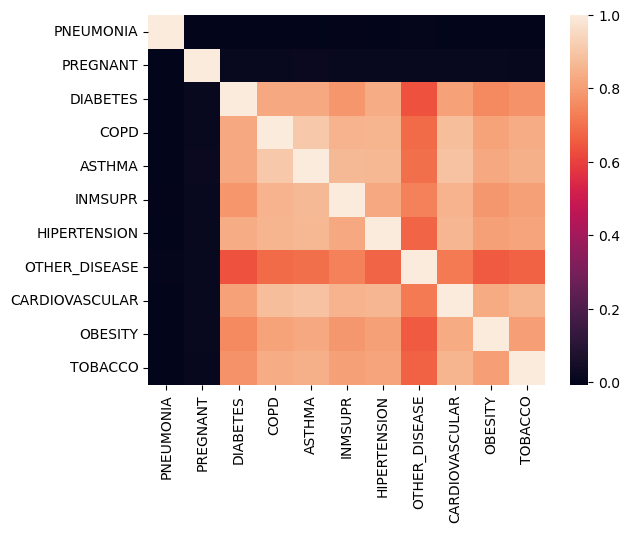

In [216]:
sns.heatmap(underlying.corr())

This heatmap shows the correlation between the underlying symptoms

The following graphs show the amount of patients that had the particular condition, and whether or not they died. 1 means they had the condition, it also mean that they died. 2 means that they did not have the condition and they did not die

Text(0.5, 1.0, 'The highest number of deaths occured in patients with Pneumonia')

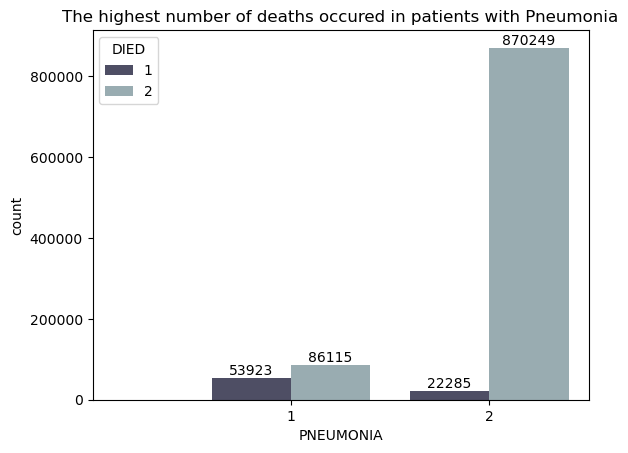

In [21]:
pneu = sns.countplot(x = covid.PNEUMONIA, hue = covid.DIED, palette = 'bone')
plt.bar_label(pneu.containers[0])
plt.bar_label(pneu.containers[1])
plt.xlim([-1,1.5])
plt.title("The highest number of deaths occured in patients with Pneumonia")

Text(0.5, 1.0, 'A very small amount of patients died who were pregnant')

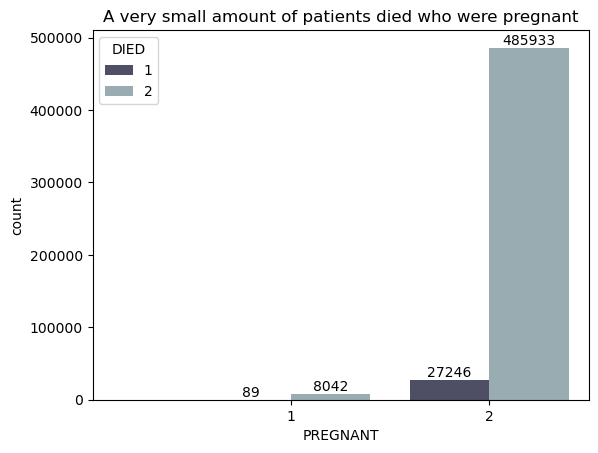

In [245]:
preg = sns.countplot(x = covid.PREGNANT, hue = covid.DIED, palette = 'bone')
plt.bar_label(preg.containers[0])
plt.bar_label(preg.containers[1])
plt.xlim([-1,1.5])
plt.title("A very small amount of patients died who were pregnant")

The number of patients that died who were pregnant is staggeringly low, though the total number of pregnant patients is low to begin with

Text(0.5, 1.0, 'More patients survived despite having diabetes')

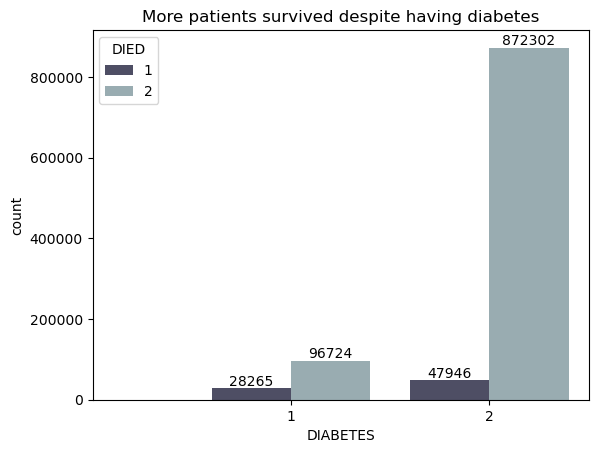

In [246]:
diab = sns.countplot(x = covid.DIABETES, hue = covid.DIED, palette = 'bone')
plt.bar_label(diab.containers[0])
plt.bar_label(diab.containers[1])
plt.xlim([-1,1.5])
plt.title("More patients survived despite having diabetes")

Text(0.5, 1.0, 'Out of the few patients with COPD, most survived')

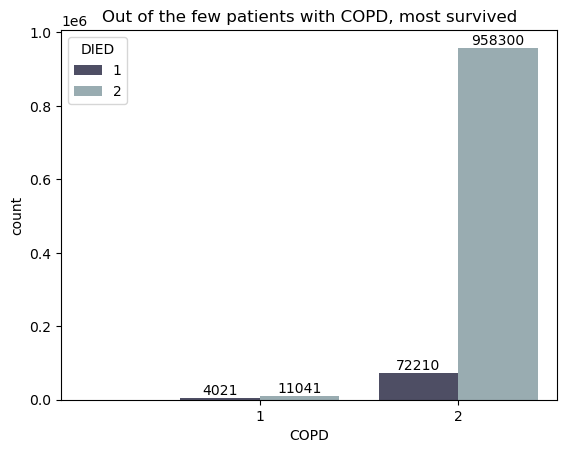

In [247]:
copd = sns.countplot(x = covid.COPD, hue = covid.DIED, palette = 'bone')
plt.bar_label(copd.containers[0])
plt.bar_label(copd.containers[1])
plt.xlim([-1,1.5])
plt.title("Out of the few patients with COPD, most survived")

Text(0.5, 1.0, 'Out of the few patients with Asthma, most survived')

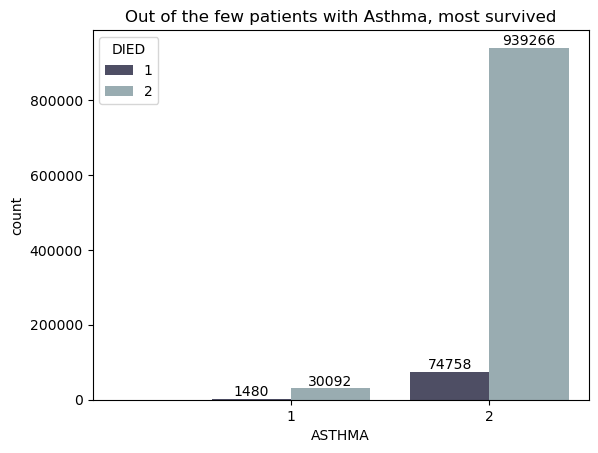

In [12]:
asth = sns.countplot(x = covid.ASTHMA, hue = covid.DIED, palette = 'bone')
plt.bar_label(asth.containers[0])
plt.bar_label(asth.containers[1])
plt.xlim([-1,1.5])
plt.title("Out of the few patients with Asthma, most survived")

Text(0.5, 1.0, 'Most of the immunosuppressed survived having covid')

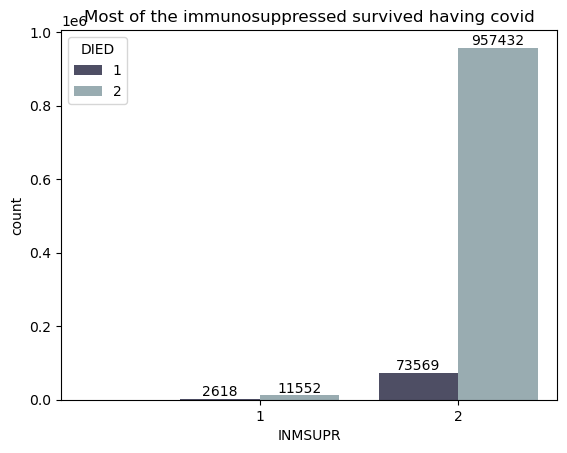

In [248]:
insm = sns.countplot(x = covid.INMSUPR, hue = covid.DIED, palette = 'bone')
plt.bar_label(insm.containers[0])
plt.bar_label(insm.containers[1])
plt.xlim([-1,1.5])
plt.title("Most of the immunosuppressed survived having covid")

Text(0.5, 1.0, 'A very large group of people had hypertension, most of them survived')

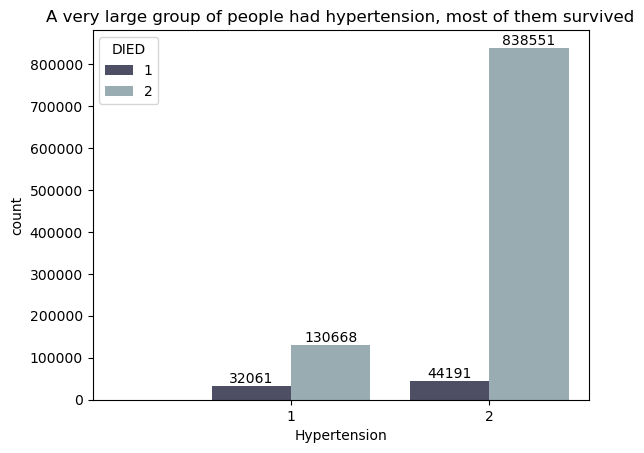

In [11]:
hipe = sns.countplot(x = covid.HIPERTENSION, hue = covid.DIED, palette = 'bone')
plt.bar_label(hipe.containers[0])
plt.bar_label(hipe.containers[1])
plt.xlim([-1,1.5])
plt.xlabel("Hypertension")
plt.title("A very large group of people had hypertension, most of them survived")

Text(0.5, 1.0, 'Most patients survived if they had other diseases')

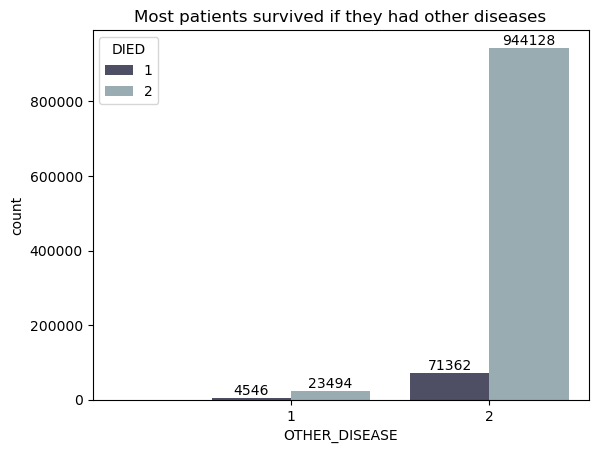

In [252]:
oth = sns.countplot(x = covid.OTHER_DISEASE, hue = covid.DIED, palette = 'bone')
plt.bar_label(oth.containers[0])
plt.bar_label(oth.containers[1])
plt.xlim([-1,1.5])
plt.title("Most patients survived if they had other diseases")

Text(0.5, 1.0, 'Few patients came in with cardiovascular issues, most of them survived')

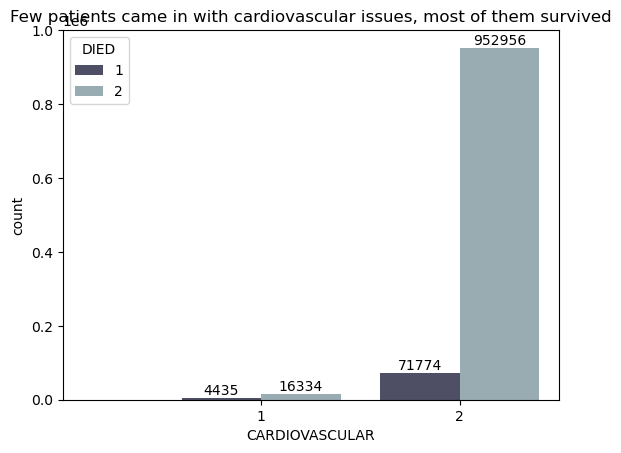

In [256]:
card = sns.countplot(x = covid.CARDIOVASCULAR, hue = covid.DIED, palette = 'bone')
plt.bar_label(card.containers[0])
plt.bar_label(card.containers[1])
plt.xlim([-1,1.5])
plt.title("Few patients came in with cardiovascular issues, most of them survived")

Text(0.5, 1.0, 'A very large number of patients had obesity, a large number died')

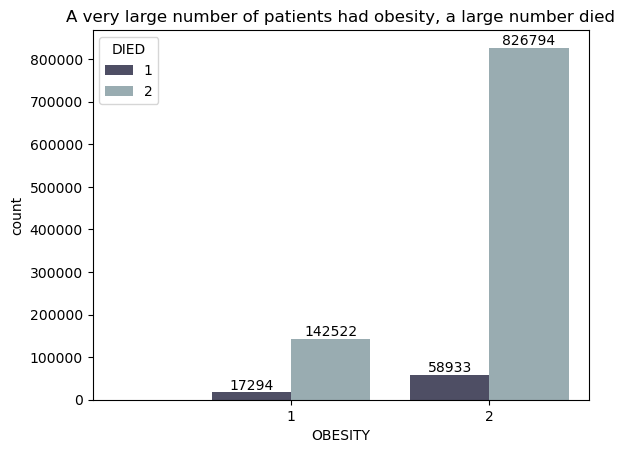

In [257]:
obes = sns.countplot(x = covid.OBESITY, hue = covid.DIED, palette = 'bone')
plt.bar_label(obes.containers[0])
plt.bar_label(obes.containers[1])
plt.xlim([-1,1.5])
plt.title("A very large number of patients had obesity, a large number died")

(-1.0, 1.5)

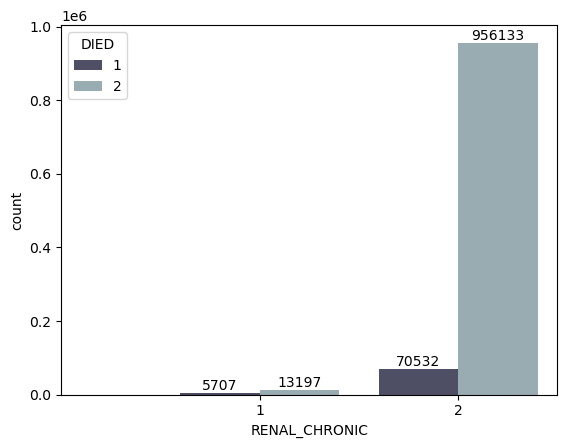

In [207]:
rena = sns.countplot(x = covid.RENAL_CHRONIC, hue = covid.DIED, palette = 'bone')
plt.bar_label(rena.containers[0])
plt.bar_label(rena.containers[1])
plt.xlim([-1,1.5])

Text(0.5, 1.0, 'A small number of patients who were tobacco users died')

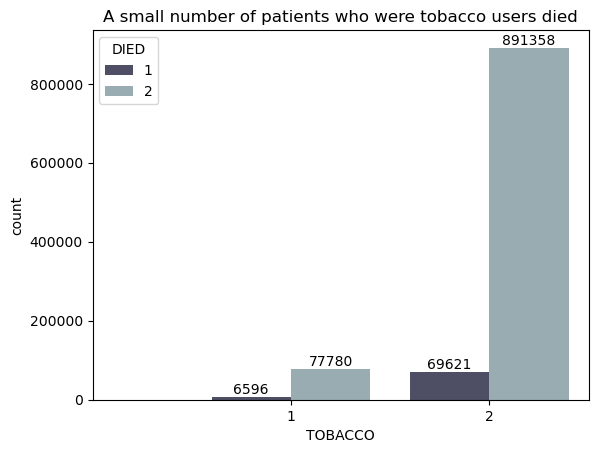

In [258]:
toba = sns.countplot(x = covid.TOBACCO, hue = covid.DIED, palette = 'bone')
plt.bar_label(toba.containers[0])
plt.bar_label(toba.containers[1])
plt.xlim([-1,1.5])
plt.title("A small number of patients who were tobacco users died")

Text(0.5, 1.0, 'If a patient entered the ICU, there was almost a 50/50 chance of them coming out')

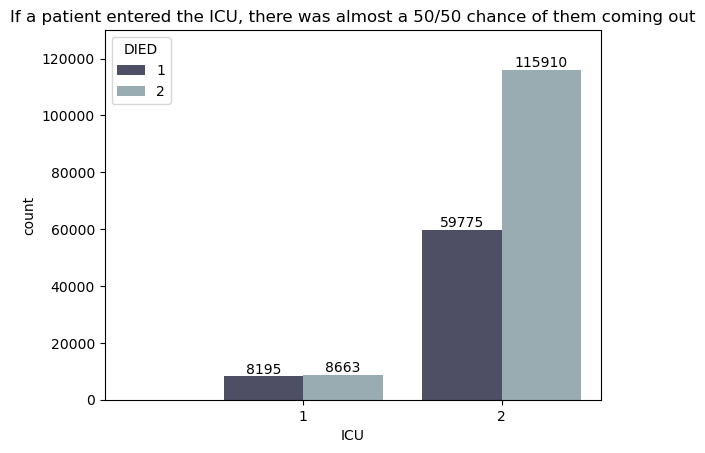

In [260]:
icu = sns.countplot(x = covid.ICU, hue = covid.DIED, palette = 'bone')
plt.bar_label(icu.containers[0])
plt.bar_label(icu.containers[1])
plt.xlim([-1,1.5])
plt.ylim([0,130000])
plt.title("If a patient entered the ICU, there was almost a 50/50 chance of them coming out")

For those patients that entered the icu, nearly half of them died.

In [14]:
age = covid[['AGE','INTUBED']]

Text(0.5, 1.0, 'The 20-40 age groups had the most patients')

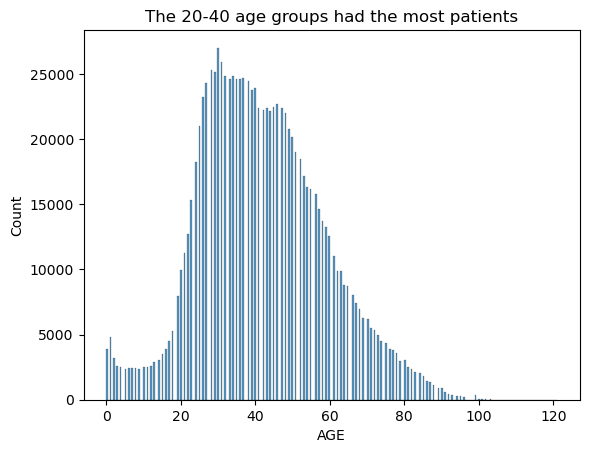

In [15]:
sns.histplot(age.AGE)
plt.title("The 20-40 age groups had the most patients")

From this plot, we can see that the 20-40 age group had the most patients

Text(0.5, 1.0, 'Very few patients needed to be intubated')

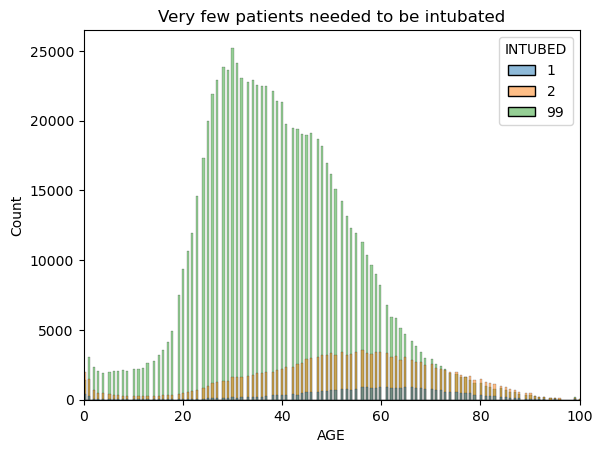

In [16]:
age_int = sns.histplot(x = age.AGE, hue = age.INTUBED, palette = 'tab10')
plt.xlim([0,100])
#plt.xticks(10)
plt.title("Very few patients needed to be intubated")

This graph looks at the ages of people who were intubated and those who were not. There are many more patients who were not intubated.

Text(0.5, 1.0, 'Patients ages 40-80 were the most likely to be intubated')

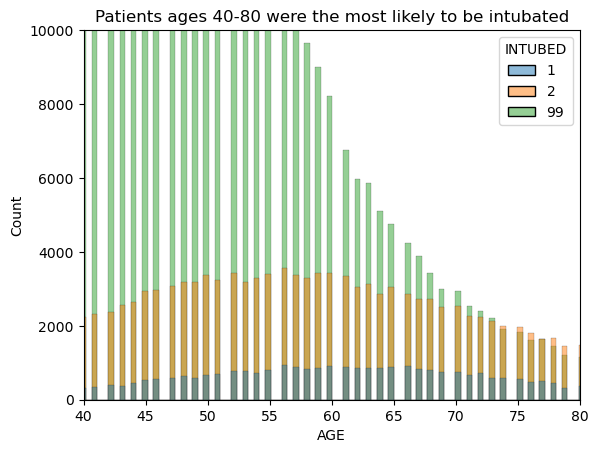

In [17]:
age_int = sns.histplot(x = age.AGE, hue = age.INTUBED, palette = 'tab10')
plt.xlim([40,80])
plt.ylim([0,10000])
plt.title("Patients ages 40-80 were the most likely to be intubated")

This is the same graph as above, but zoomed in on the section with the highest amount of intubation in patients